## Decision Tree Ensembles - Bagging and Boosting

So far we have seen what Decision Trees are and we have gone as far as to say that they are the base for some of the more accurate models which are used in recent times. In this tutorial you will see how exactly this works.

To start off with, let us become a little more clear on what exactly an 'Ensemble' is.

### Ensemble Learning

Ensemble learning is a machine learning paradigm where multiple models (often called “weak learners”) are trained to solve the same problem and combined to get better results. The main hypothesis is that when weak models are correctly combined we can obtain more accurate and/or robust models.

A Decision Tree Ensemble is a form of Ensemble learning which uses Decision Trees as the models (weak learners) which are later combined.

### What exactly is a Weak Learner?

Before we get into the details of what exactly a weak learner is, let us first understand or revise what exactly is the Bias-Variance Tradeoff.

A low bias and a low variance, although they most often vary in opposite directions, are the two most fundamental features expected for a model. Indeed, to be able to “solve” a problem, we want our model to avoid High Bias ( caused by underfitting) by resolving the underlying complexity of the data we are working with, but we also want it to avoid high variance (caused by overfitting) and be more robust. This is the well known Bias-Variance Tradeoff.

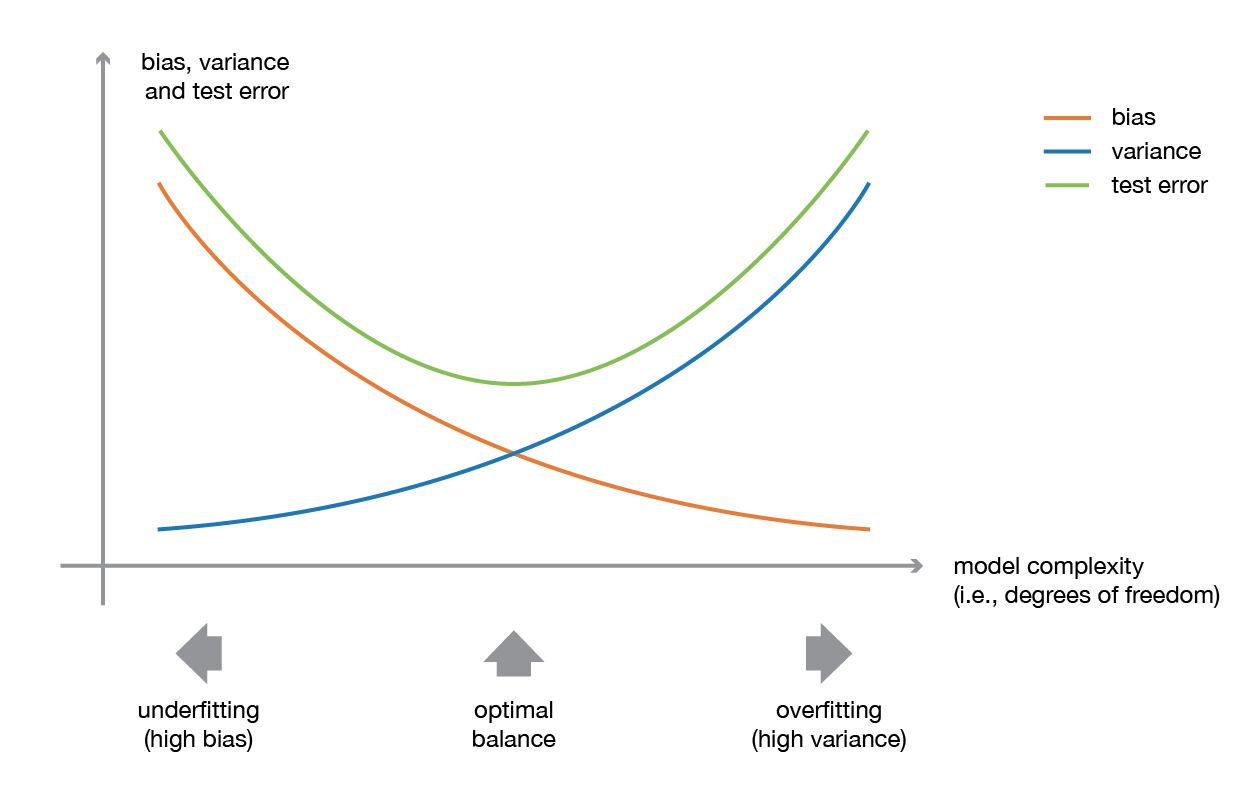

In ensemble learning theory, we call weak learners (or base models), models that can be used as building blocks for designing more complex models by combining several of them. Most of the time, these basics models perform not so well by themselves either because they have a high bias or because they have too much variance to be robust. Then, the idea of ensemble methods is to try reducing bias and/or variance of such weak learners by combining several of them together in order to create a strong learner (or ensemble model) that achieves better performances.

One important point is that our choice of weak learners should be coherent with the way we aggregate these models. If we choose base models with low bias but high variance, it should be with an aggregating method that tends to reduce variance whereas if we choose base models with low variance but high bias, it should be with an aggregating method that tends to reduce bias.

### Different Ensemble Methods

This brings us to the question of how to combine these models. We can mention two major kinds of algorithms that aims at combining weak learners:

- Bagging, that often considers the same kind of weak learners, learns them independently from each other in parallel and combines them following some kind of averaging process
- Boosting, that often considers the same kind of weak learners, learns them sequentially in a very adaptative way (a base model depends on the previous ones) and combines them following some strategy

Very roughly, we can say that bagging will mainly focus at getting an ensemble model with less variance than its components whereas boosting and stacking will mainly try to produce strong models less biased than their components (even if variance can also be reduced).

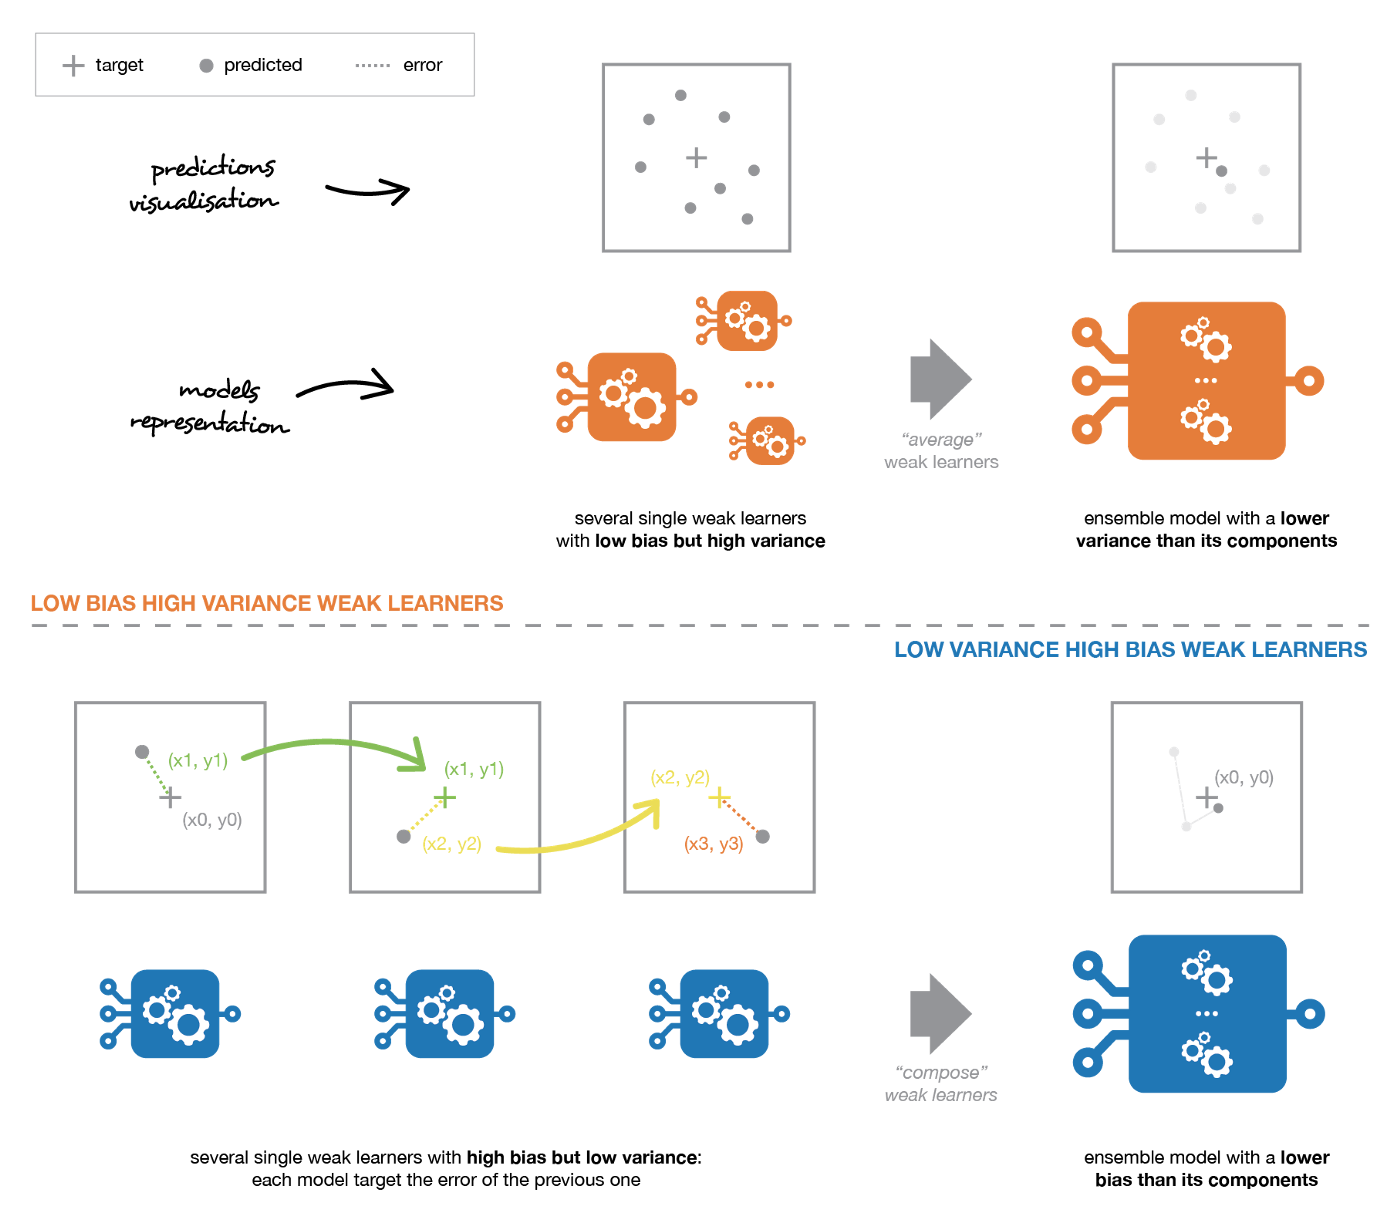

## Bagging

In parallel ensemble methods we fit the different considered learners independently from each other and, so, it is possible to train them together. The most famous such approach is “bagging” (stands for “bootstrap aggregating”) that aims at producing an ensemble model that is more accurate than the individual models composing it.

#### Bootstrapping

Let’s begin by defining bootstrapping. This technique consists of generating samples of size B (called bootstrap samples) from an initial dataset of size N by randomly choosing entries from the dataset where repitition of the entries is allowed.

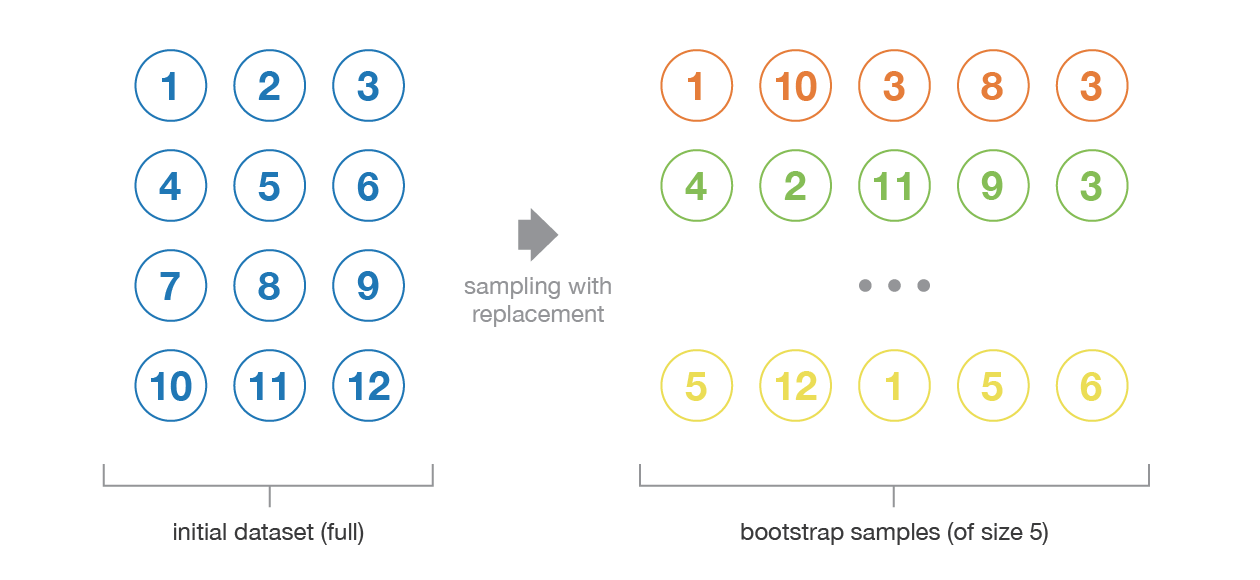

We can approximately say that these new bootstrap samples that have been formed are both representative and Independent of the initial dataset. But you should definitely keep in mind that this is only an approximation of the initial dataset.


#### Training using Bagging

First, we create multiple bootstrap samples so that each new bootstrap sample will act as another (almost) independent dataset drawn from true distribution. Then, we can fit a Decision Tree (weak learner) for each of these samples and finally aggregate them such that we kind of “average” their outputs and, so, obtain an ensemble model with less variance that its components.
Now whenever we have to predict the value for a new test value, we get results from all the Decision Trees that were made and we take an average of all those results. In some manner this helps us reduce the effect of the errors which are made during prediction with a single Decision Tree. Pretty Simple isn't it?

#### Something Extra to think about :P

Since we have to create a good number of Decision Trees, we will need a lot of time to make them right? But what if your computer has more resources than you are using? We could paralellise the process of making these Decision Trees by performing this operation on all the multiple cores of your computer!! This increases training speed significantly and usually can make the whole learning process 3-4 times faster!!

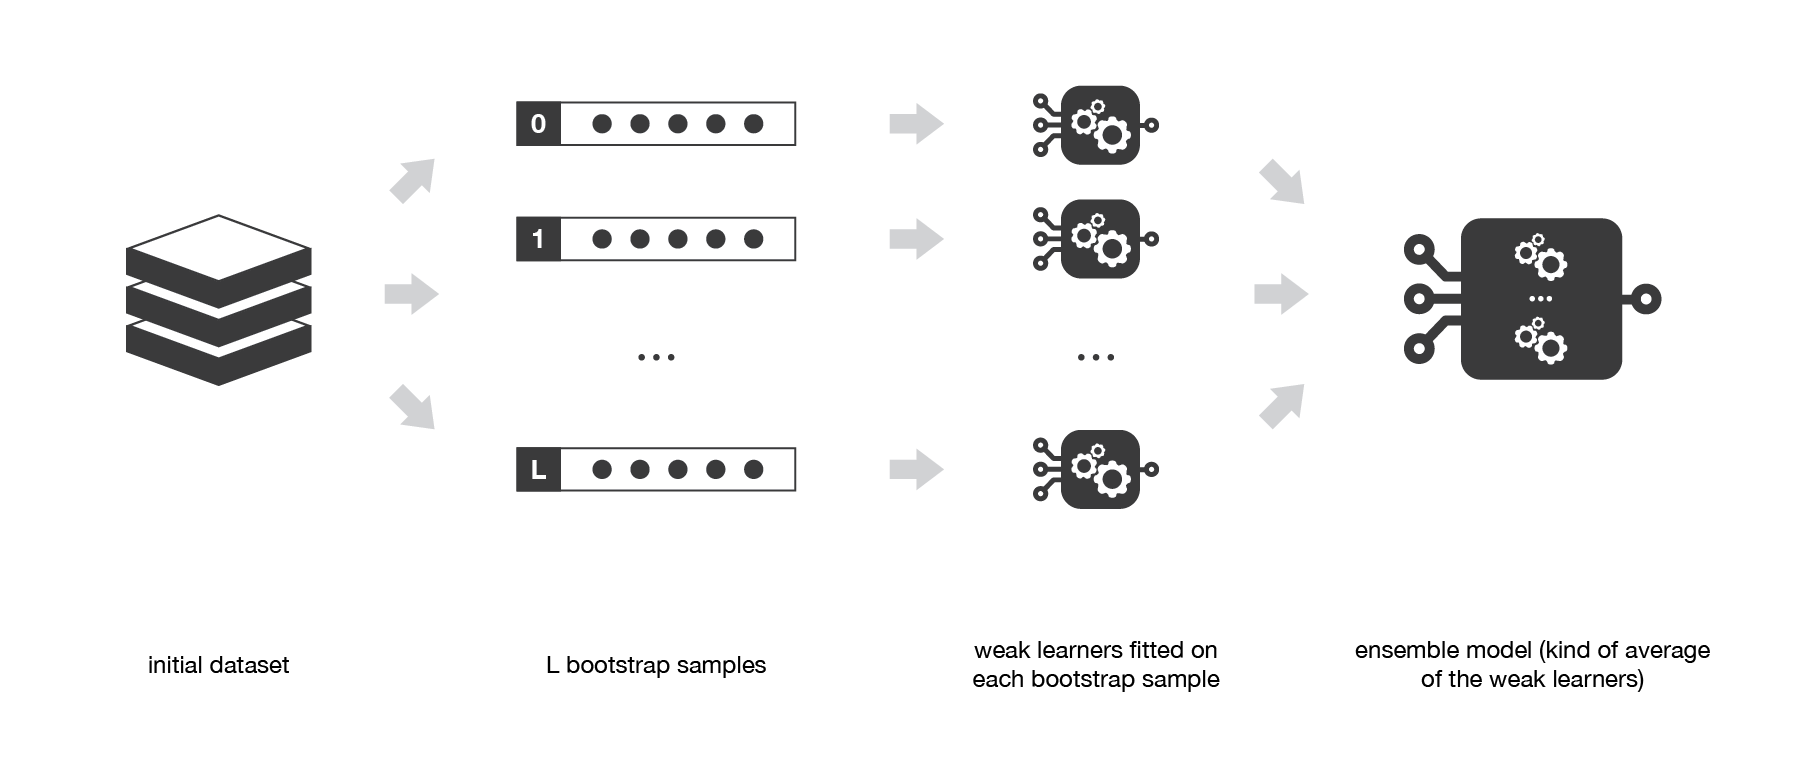

## Boosting

This will be a slightly longer algorithm as it has many different components to it, so sit back and enjoy the show!!

Let's get started!!

In sequential ensemble methods the different combined weak models are no longer fitted independently from each others. The idea is to fit models iteratively such that the training of model at a given step depends on the models fitted at the previous steps. “Boosting” is the most famous of these approaches and it produces an ensemble model that is in general less biased than the weak learners that compose it.

Boosting methods work in the same spirit as bagging methods: we build a family of models that are aggregated to obtain a strong learner that performs better. However, unlike bagging that mainly aims at reducing variance, boosting is a technique that consists in fitting sequentially multiple weak learners in a very adaptative way: each model in the sequence is fitted giving more importance to observations in the dataset that were badly handled by the previous models in the sequence. 

Intuitively, each new model focus its efforts on the most difficult observations to fit up to now, so that we obtain, at the end of the process, a strong learner with lower bias (even if we can notice that boosting can also have the effect of reducing variance).

Ideally we will want to choose weak learners which have High Bias but low Viriance for this algorithm.

Once the weak learners have been chosen, we still need to define how they will be sequentially fitted (what information from previous models do we take into account when fitting current model?) and how they will be aggregated (how do we aggregate the current model to the previous ones?). We will discuss these questions now, describing two important boosting algorithms: adaboost and gradient boosting.

In a nutshell, these two algorithms differ on how they create and aggregate the weak learners during the sequential process. Adaptive boosting ("Ada-Boost") updates the weights attached to each of the training dataset observations whereas gradient boosting updates the value of these observations. 

This main difference comes from the way both methods try to solve the optimisation problem of finding the best model.

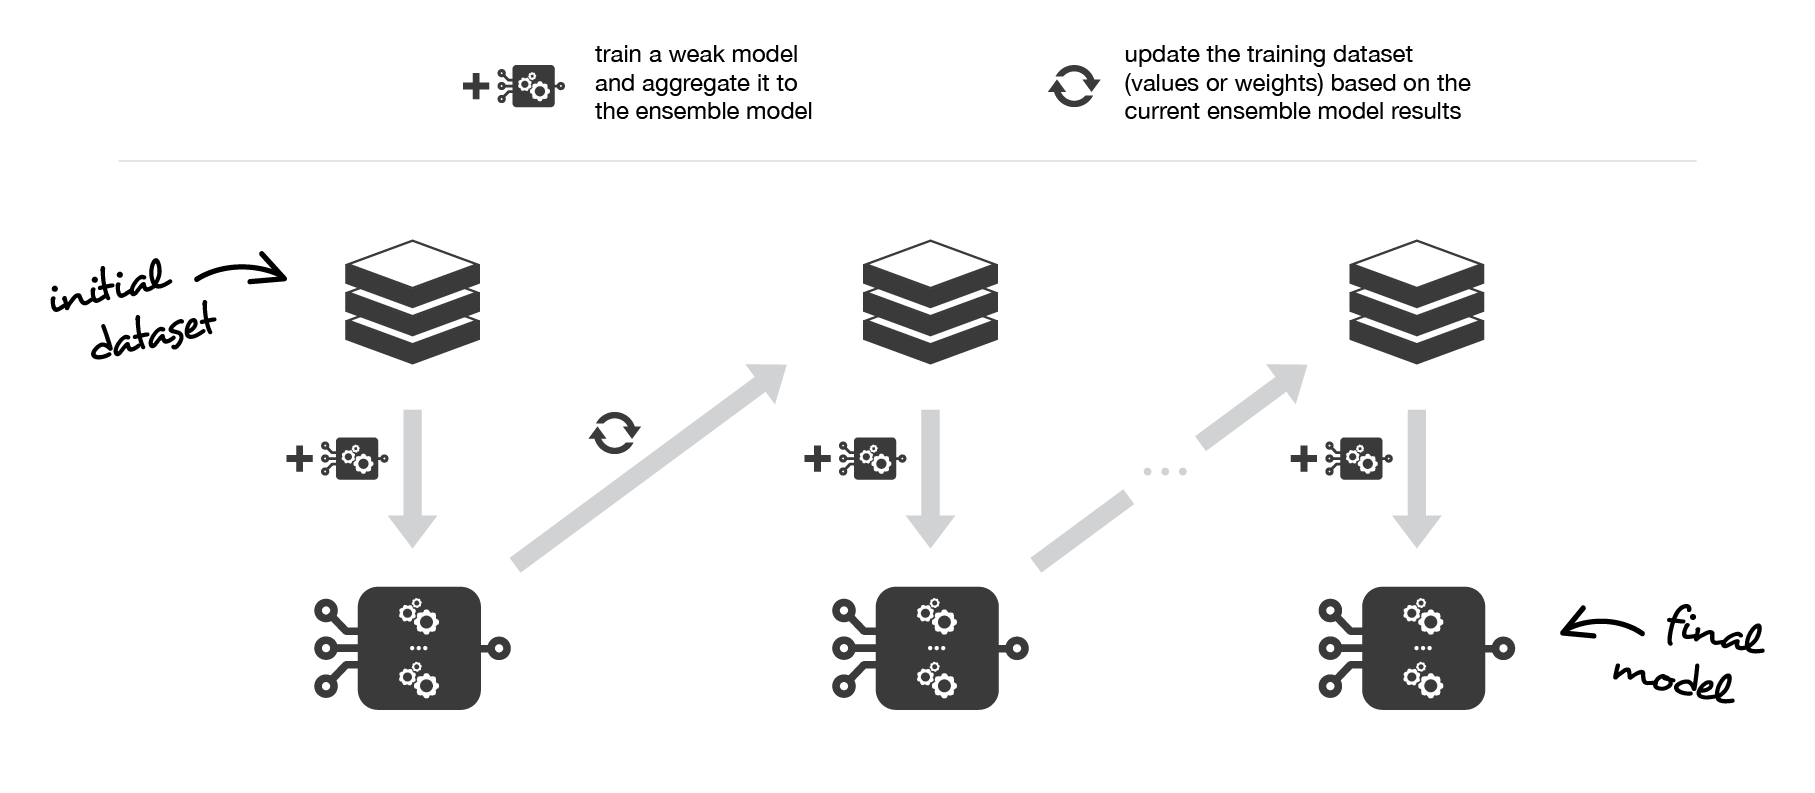

### Adaptive Boosting

In adaptative boosting (often called “adaboost”), we try to define our ensemble model as a weighted sum of L weak learners

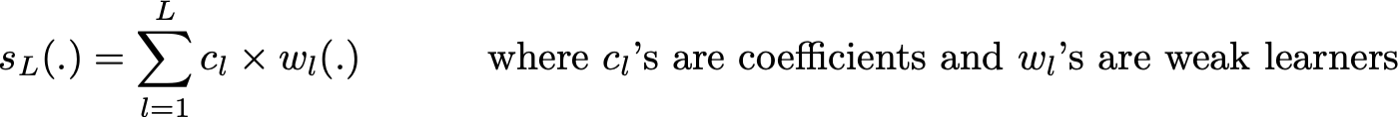

Finding the best ensemble model with this form is a difficult optimisation problem. Then, instead of trying to solve it in one single shot (finding all the coefficients and weak learners that give the best overall additive model), we make use of an iterative optimisation process that is much more tractable, even if it can lead to a sub-optimal solution. More especially, we add the weak learners one by one, looking at each iteration for the best possible pair (coefficient, weak learner) to add to the current ensemble model. In other words, we define recurrently the (s_l)’s such that

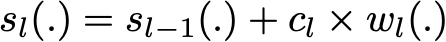

where c_l and w_l are chosen such that s_l is the model that fit the best the training data and, so, that is the best possible improvement over s_(l-1).

#### The AdaBoost algorithm in detail

Assume that we are facing a binary classification problem, with N observations in our dataset and we want to use adaboost algorithm with a given family of weak models. 

When considering a binary classification, we can show that the adaboost algorithm can be re-written into a process that proceeds as follows. 

First, it updates the observations weights in the dataset and train a new weak learner with a special focus given to the observations misclassified by the current ensemble model. 

Second, it adds the weak learner to the weighted sum according to an update coefficient that expresse the performances of this weak model: the better a weak learner performs, the more it contributes to the strong learner.

Another way to explain the algorithm is:

At the very beginning of the algorithm (first model of the sequence), all the observations have the same weights 1/N. Then, we repeat L times (for the L learners in the sequence) the following steps:

- fit the best possible weak model with the current observations weights
- compute the value of the update coefficient that is some kind of scalar evaluation metric of the weak learner that indicates how much this weak learner should be taken into account into the ensemble model
- update the strong learner by adding the new weak learner multiplied by its update coefficient
- compute new observations weights that expresse which observations we would like to focus on at the next iteration (weights of observations wrongly predicted by the aggregated model increase and weights of the correctly predicted observations decrease)

Repeating these steps, we have then build sequentially our L models and aggregate them into a simple linear combination weighted by coefficients expressing the performance of each learner.

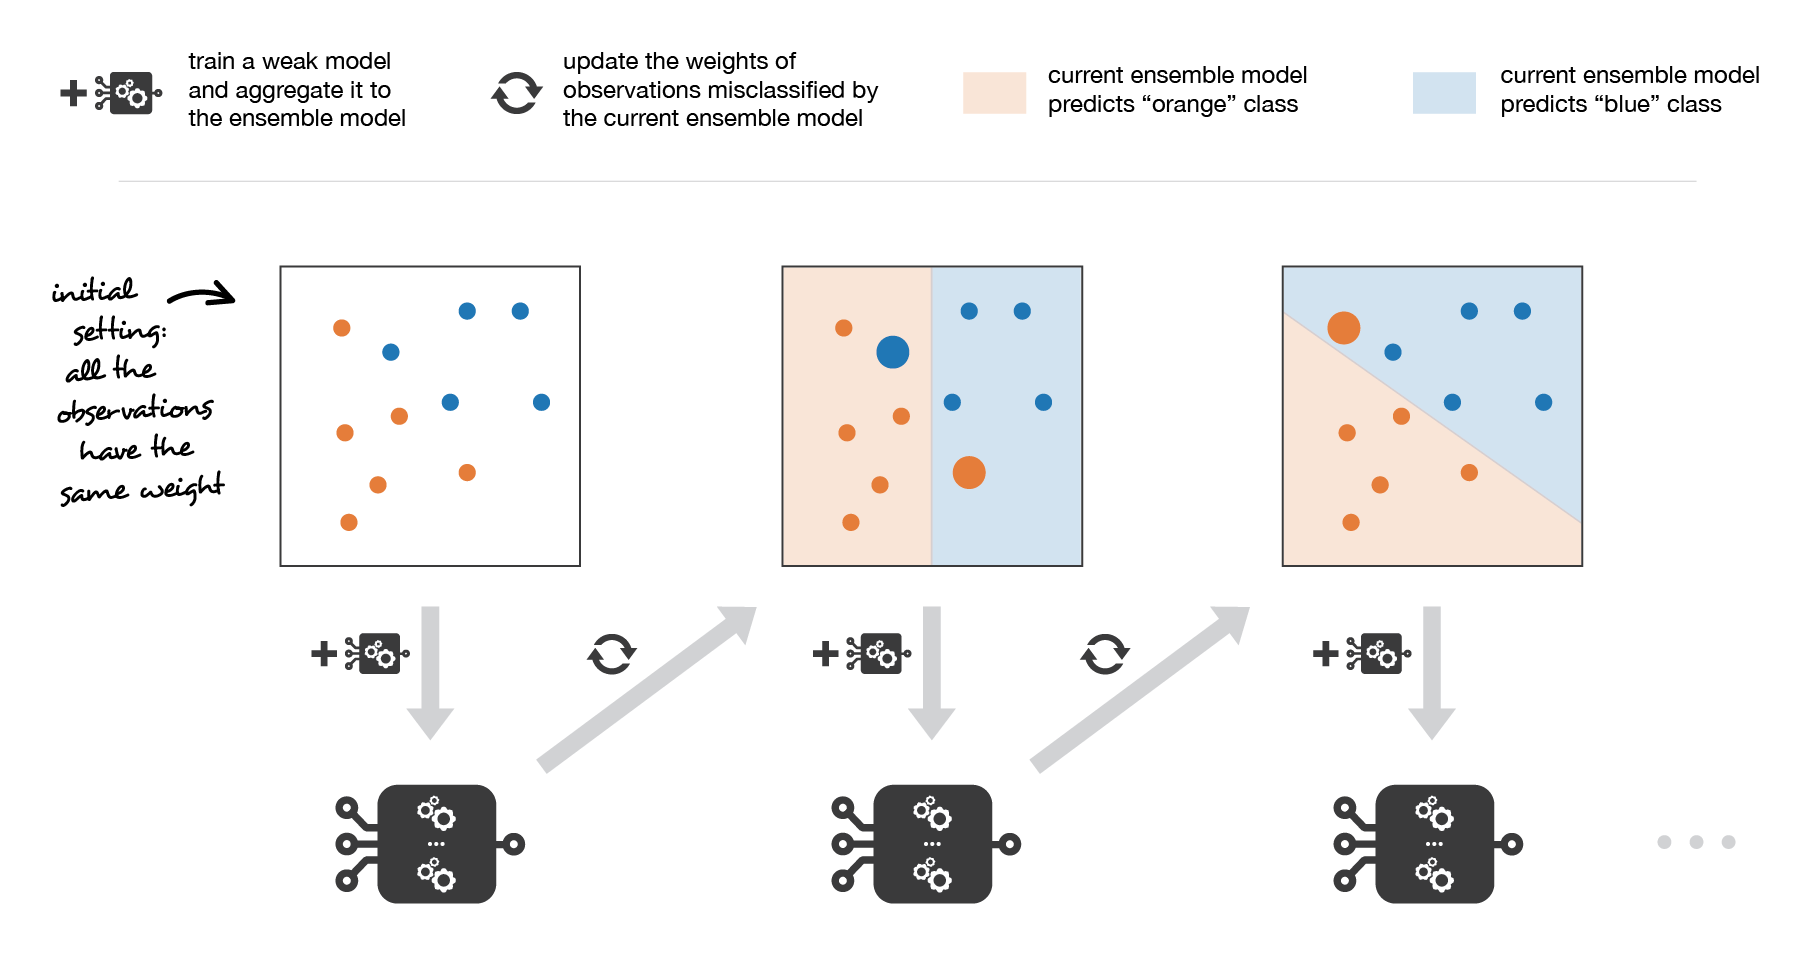

### Gradient Boosting

In gradient boosting, the ensemble model we try to build is also a weighted sum of weak learners

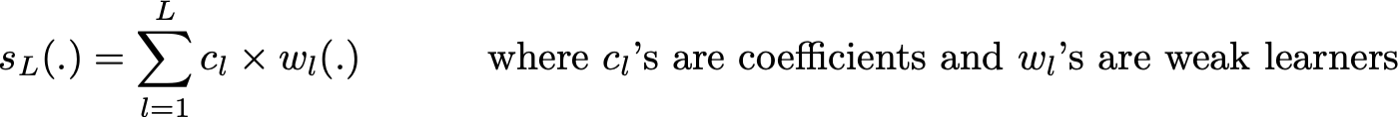

Just as we mentioned for adaboost, finding the optimal model under this form is too difficult and an iterative approach is required. The main difference with adaptative boosting is in the definition of the sequential optimisation process. Indeed, gradient boosting casts the problem into a gradient descent one: at each iteration we fit a weak learner to the opposite of the gradient of the current fitting error with respect to the current ensemble model. Let’s try to clarify this last point. First, theoretical gradient descent process over the ensemble model can be written

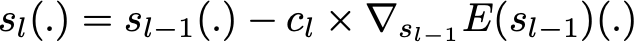

where E(.) is the fitting error of the given model, c_l is a coefficient corresponding to the step size and

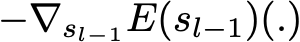

is the opposite of the gradient of the fitting error with respect to the ensemble model at step l-1. This (pretty abstract) opposite of the gradient is a function that can, in practice, only be evaluated for observations in the training dataset (for which we know inputs and outputs). Finally, the coefficient c_l is computed following a one dimensional optimisation process

#### The Gradient Boosting Algorithm in Detail

So, assume that we want to use gradient boosting technique with a given family of weak models. At the very beginning of the algorithm (first model of the sequence), the pseudo-residuals are set equal to the observation values. Then, we repeat L times (for the L models of the sequence) the following steps:

- fit the best possible weak learner to pseudo-residuals (approximate the opposite of the gradient with respect to the current strong learner)
- compute the value of the optimal step size that defines by how much we update the ensemble model in the direction of the new weak learner
- update the ensemble model by adding the new weak learner multiplied by the step size (make a step of gradient descent)
- compute new pseudo-residuals that indicate, for each observation, in which direction we would like to update next the ensemble model predictions

Repeating these steps, we have then build sequentially our L models and aggregate them following a gradient descent approach. Notice that, while adaptative boosting tries to solve at each iteration exactly the “local” optimisation problem (find the best weak learner and its coefficient to add to the strong model), gradient boosting uses instead a gradient descent approach and can more easily be adapted to large number of loss functions. Thus, gradient boosting can be considered as a generalization of adaboost to arbitrary differentiable loss functions.

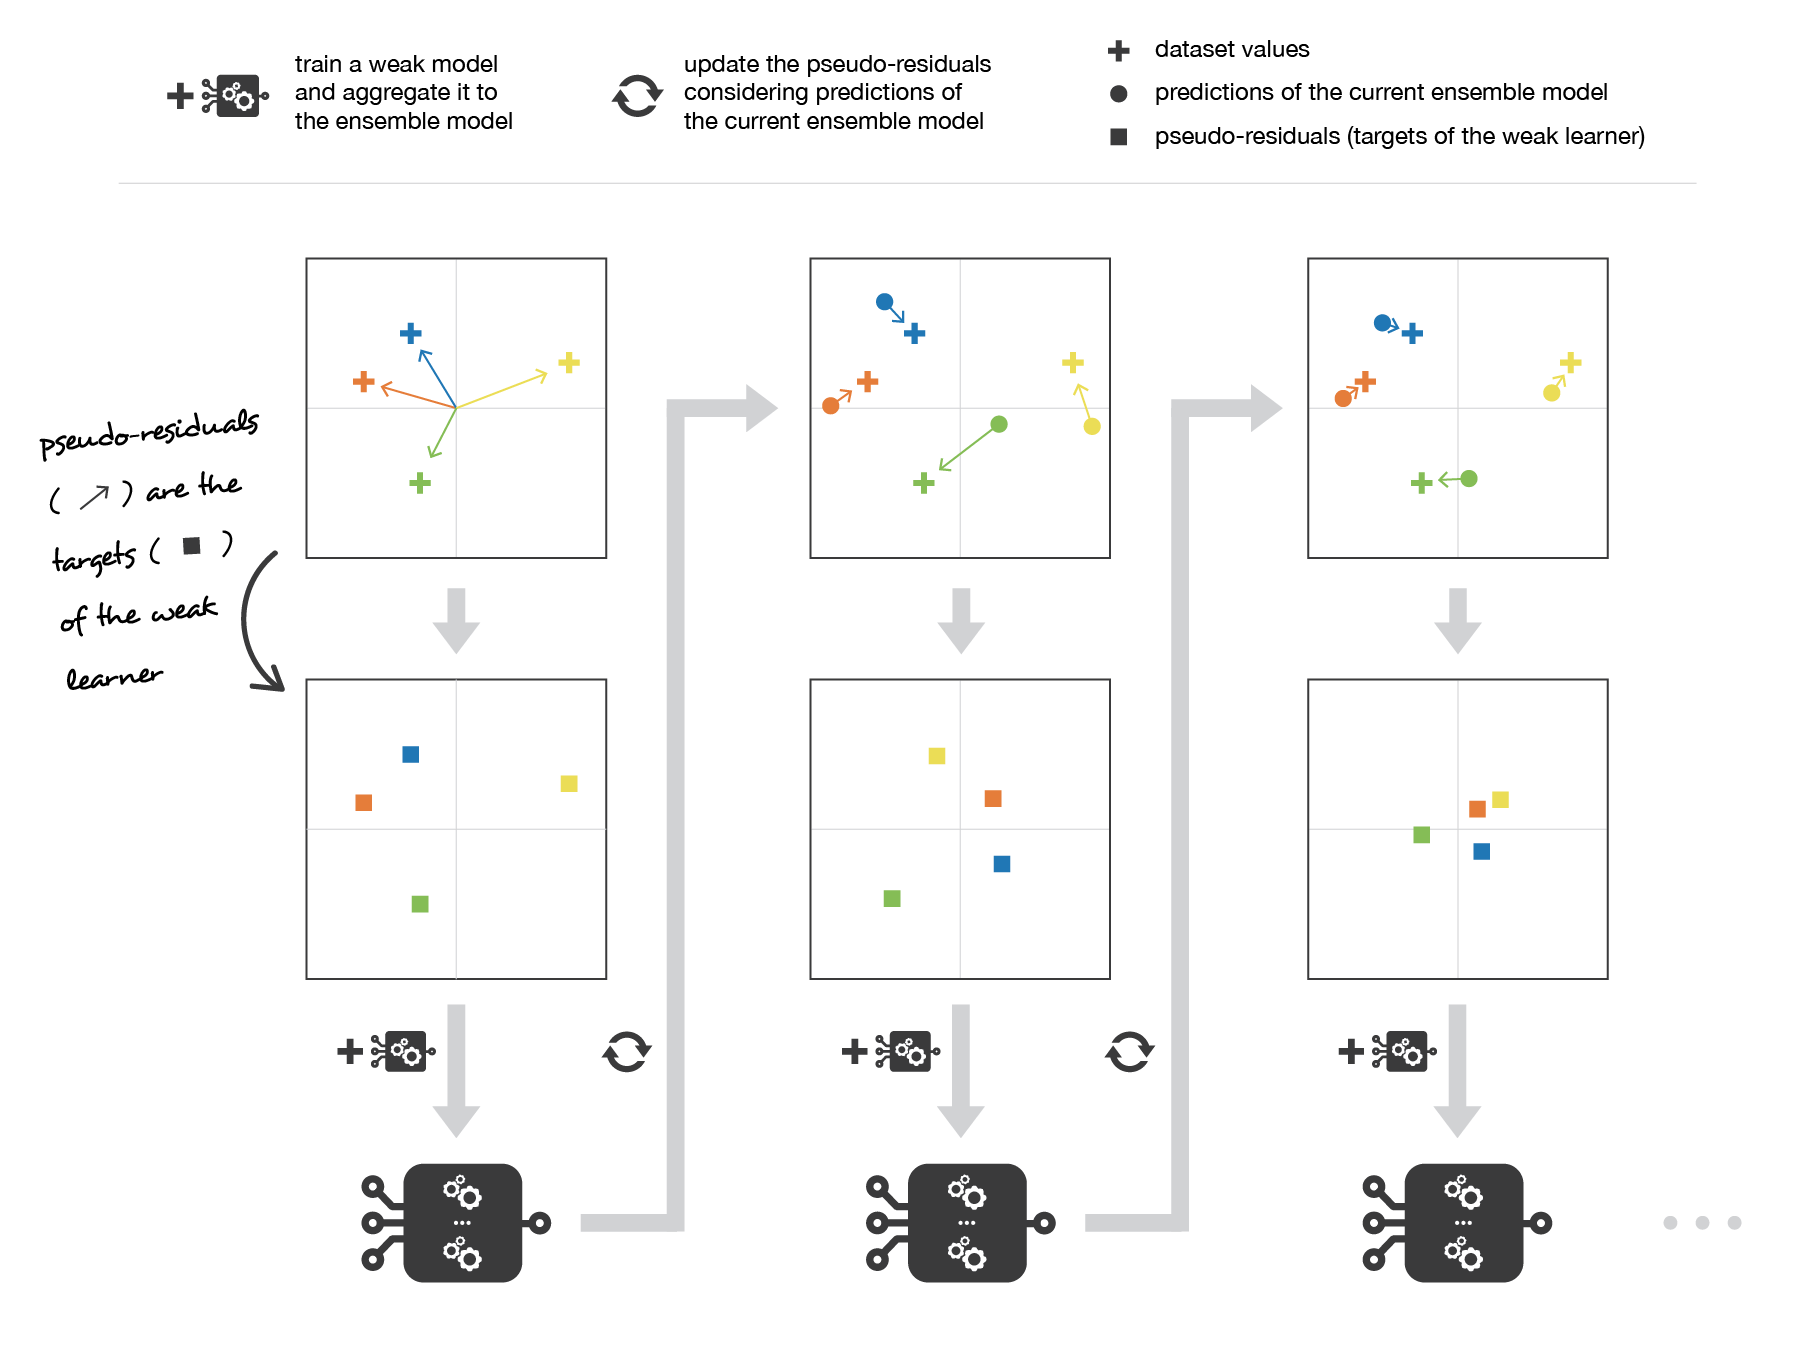

## To summarize

- ensemble learning is a machine learning paradigm where multiple models (often called weak learners or base models) are trained to solve the same problem and combined to get better performances
- the main hypothesis is that if we combine the weak learners the right way we can obtain more accurate and/or robust models
- in bagging methods, several instance of the same base model are trained in parallel (independently from each others) on different bootstrap samples and then aggregated in some kind of “averaging” process
- the kind of averaging operation done over the fitted models in bagging methods mainly allows us to obtain an ensemble model with a lower variance than its components: that is why base models with low bias but high variance are well adapted for bagging
- in boosting methods, several instance of the same base model are trained sequentially such that, at each iteration, the way to train the current weak learner depends on the previous weak learners and more especially on how they are performing on the data
- this iterative strategy of learning used in boosting methods, that adapts to the weaknesses of the previous models to train the current one, mainly allows us to get an ensemble model with a lower bias than its components: that is why weak learners with low variance but high bias are well adapted for boosting.

Well Done!!

You have now successfully learnt some of the more accurate machine learning models of recent times and can use this in whatever Machine Learning Project you intend to try out!!!

That's all for this tutorial!!

See you in the next session!!!